c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Độ chính xác trên dữ liệu gốc: 90.78%
                     precision    recall  f1-score     support
Insufficient_Weight   0.948276  0.982143  0.964912   56.000000
Normal_Weight         0.813559  0.774194  0.793388   62.000000
Obesity_Type_I        0.946667  0.910256  0.928105   78.000000
Obesity_Type_II       0.966102  0.982759  0.974359   58.000000
Obesity_Type_III      1.000000  1.000000  1.000000   63.000000
Overweight_Level_I    0.779661  0.821429  0.800000   56.000000
Overweight_Level_II   0.880000  0.880000  0.880000   50.000000
accuracy              0.907801  0.907801  0.907801    0.907801
macro avg             0.904895  0.907254  0.905823  423.000000
weighted avg          0.907988  0.907801  0.907636  423.000000


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Độ chính xác trên dữ liệu giảm chiều bằng PCA: 77.54%
                     precision    recall  f1-score     support
Insufficient_Weight   0.822581  0.910714  0.864407   56.000000
Normal_Weight         0.648148  0.564516  0.603448   62.000000
Obesity_Type_I        0.818182  0.692308  0.750000   78.000000
Obesity_Type_II       0.808824  0.948276  0.873016   58.000000
Obesity_Type_III      0.984375  1.000000  0.992126   63.000000
Overweight_Level_I    0.637931  0.660714  0.649123   56.000000
Overweight_Level_II   0.647059  0.660000  0.653465   50.000000
accuracy              0.775414  0.775414  0.775414    0.775414
macro avg             0.766728  0.776647  0.769369  423.000000
weighted avg          0.773221  0.775414  0.771829  423.000000

So sánh độ chính xác giữa các trường hợp:
- Độ chính xác trên dữ liệu gốc: 0.91
- Độ chính xác trên dữ liệu giảm chiều (PCA): 0.78
- Độ chính xác với regularization (alpha=0.01): 0.91

Nhận xét về hiện tượng overfitting:
- Mô hình trên dữ liệu gốc có 

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Độ chính xác với regularization (alpha=0.01): 91.25%
                     precision    recall  f1-score    support
Insufficient_Weight   0.948276  0.982143  0.964912   56.00000
Normal_Weight         0.813559  0.774194  0.793388   62.00000
Obesity_Type_I        0.959459  0.910256  0.934211   78.00000
Obesity_Type_II       0.966102  0.982759  0.974359   58.00000
Obesity_Type_III      1.000000  1.000000  1.000000   63.00000
Overweight_Level_I    0.793103  0.821429  0.807018   56.00000
Overweight_Level_II   0.884615  0.920000  0.901961   50.00000
accuracy              0.912530  0.912530  0.912530    0.91253
macro avg             0.909302  0.912969  0.910836  423.00000
weighted avg          0.912672  0.912530  0.912287  423.00000


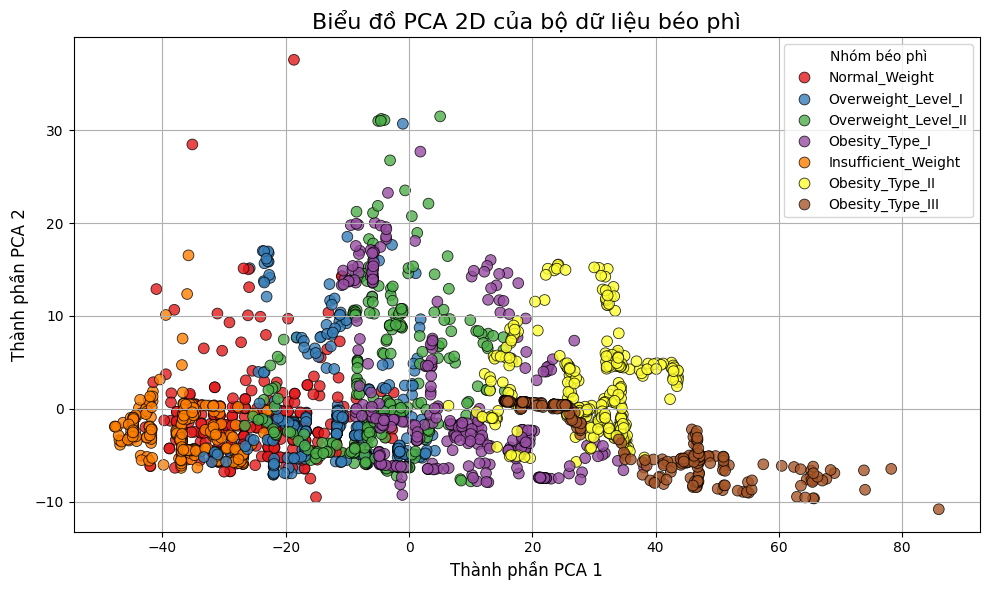

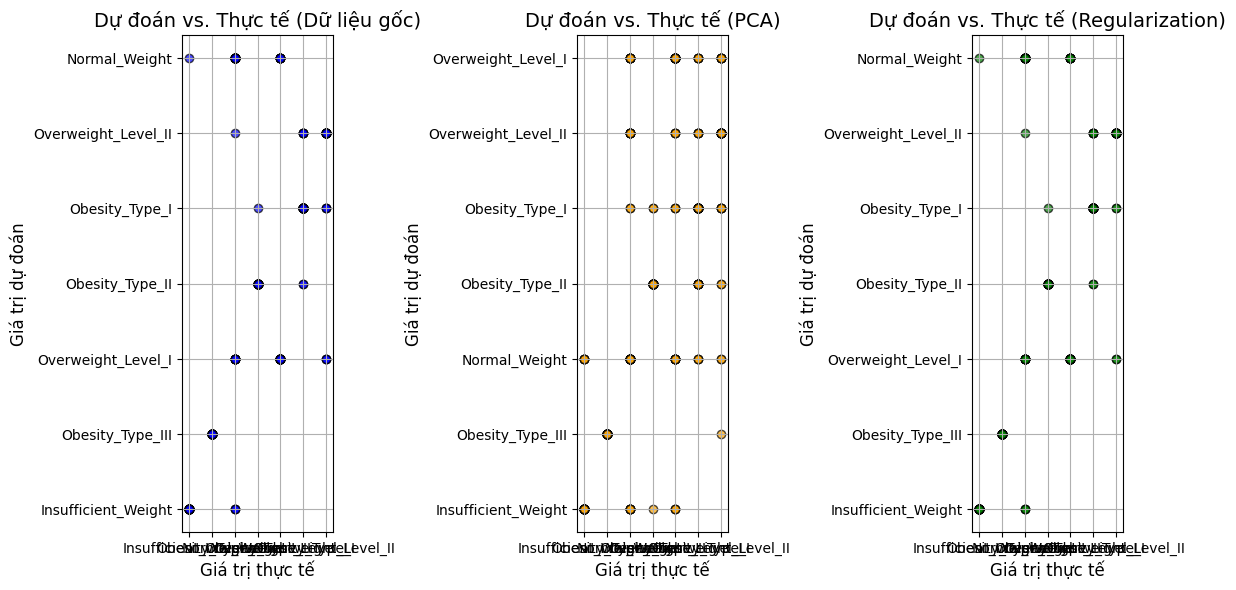


Confusion Matrix (Dữ liệu gốc):
[[55  1  0  0  0  0  0]
 [ 3 48  0  0  0 10  1]
 [ 0  0 71  2  0  0  5]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0 10  0  0  0 46  0]
 [ 0  0  3  0  0  3 44]]

Confusion Matrix (PCA):
[[51  5  0  0  0  0  0]
 [ 7 35  2  0  0  9  9]
 [ 0  3 54 11  0  5  5]
 [ 1  0  2 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 3  9  3  0  0 37  4]
 [ 0  2  5  2  1  7 33]]

Confusion Matrix (Regularization):
[[55  1  0  0  0  0  0]
 [ 3 48  0  0  0 10  1]
 [ 0  0 71  2  0  0  5]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0 10  0  0  0 46  0]
 [ 0  0  2  0  0  2 46]]

Nhận xét về sự phù hợp của mô hình dựa trên trực quan hóa:
- Dữ liệu gốc: Nếu scatter plot cho thấy các điểm tập trung gần đường chéo, mô hình hoạt động tốt nhưng có thể có overfitting.
- PCA: Hiệu năng giảm so với dữ liệu gốc nhưng có thể giúp giảm phức tạp của mô hình.
- Regularization: Thường giúp cân bằng giữa độ chính xác và khả năng tổng quát, giảm khả năng overfitting.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix

# a)
# Đọc dữ liệu từ file
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Xác định đầu vào X (features) và đầu ra y (nhãn)
X = data.iloc[:, :-1]  # Các cột đầu vào
y = data.iloc[:, -1]   # Cột cuối cùng là nhãn

# Xử lý dữ liệu categorical nếu có
X = pd.get_dummies(X)  # Chuyển đổi các cột dạng categorical sang one-hot encoding

# Chuẩn hóa dữ liệu (đưa dữ liệu về cùng thang đo)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Huấn luyện mô hình MLP trên dữ liệu gốc
mlp_original = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_original.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_original = mlp_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

print("Độ chính xác trên dữ liệu gốc: {:.2f}%".format(accuracy_original * 100))
classification_report_df_original = pd.DataFrame(classification_report(y_test, y_pred_original, output_dict=True)).transpose()
print(classification_report_df_original)

# 2. Giảm chiều dữ liệu bằng PCA
pca = PCA(n_components=10)  # Lấy 10 thành phần chính
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Huấn luyện mô hình MLP trên dữ liệu đã giảm chiều
mlp_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_pca.fit(X_train_pca, y_train)

# Dự đoán và đánh giá
y_pred_pca = mlp_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("\nĐộ chính xác trên dữ liệu giảm chiều bằng PCA: {:.2f}%".format(accuracy_pca * 100))
classification_report_df_pca = pd.DataFrame(classification_report(y_test, y_pred_pca, output_dict=True)).transpose()
print(classification_report_df_pca)

# So sánh kết quả giữa các trường hợp
print("\nSo sánh độ chính xác giữa các trường hợp:")
print(f"- Độ chính xác trên dữ liệu gốc: {accuracy_original:.2f}")
print(f"- Độ chính xác trên dữ liệu giảm chiều (PCA): {accuracy_pca:.2f}")
print(f"- Độ chính xác với regularization (alpha=0.01): {accuracy_regularized:.2f}")

# 3. Đánh giá hiện tượng overfitting
print("\nNhận xét về hiện tượng overfitting:")
if accuracy_original > accuracy_pca:
    print("- Mô hình trên dữ liệu gốc có độ chính xác cao hơn dữ liệu giảm chiều.")
    print("- Điều này có thể cho thấy dữ liệu gốc cung cấp nhiều thông tin hơn, nhưng cũng có thể có nguy cơ overfitting.")
else:
    print("- Dữ liệu giảm chiều (PCA) đã giảm bớt thông tin dư thừa và đạt hiệu năng gần tương đương.")

if accuracy_original > accuracy_regularized:
    print("- Mô hình gốc có độ chính xác cao hơn so với mô hình có regularization.")
    print("- Tuy nhiên, regularization giúp kiểm soát overfitting và có thể cải thiện độ tổng quát trên dữ liệu thực tế.")
else:
    print("- Regularization không làm giảm hiệu năng và có thể giúp mô hình ổn định hơn.")

if accuracy_regularized >= accuracy_original:
    print("- Mô hình với regularization đạt hiệu năng tốt nhất, chứng tỏ overfitting đã được giảm bớt.")
else:
    print("- Regularization làm giảm hiệu năng nhưng có thể cải thiện khả năng tổng quát.")


# 4. Regularization để giảm hiện tượng overfitting
mlp_regularized = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.01, random_state=42)
mlp_regularized.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_regularized = mlp_regularized.predict(X_test)
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)

print("\nĐộ chính xác với regularization (alpha=0.01): {:.2f}%".format(accuracy_regularized * 100))
classification_report_df_regularized = pd.DataFrame(classification_report(y_test, y_pred_regularized, output_dict=True)).transpose()
print(classification_report_df_regularized)

# Trực quan hóa: Scatter plot PCA 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='Set1', s=60, alpha=0.8, edgecolor="k")
plt.title('Biểu đồ PCA 2D của bộ dữ liệu béo phì', fontsize=16)
plt.xlabel('Thành phần PCA 1', fontsize=12)
plt.ylabel('Thành phần PCA 2', fontsize=12)
plt.legend(title='Nhóm béo phì', loc='best', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# b)
# Trực quan hóa: Mối quan hệ giữa dự đoán và thực tế
plt.figure(figsize=(12, 6))

# Biểu đồ Dữ liệu gốc
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_original, alpha=0.7, color='blue', edgecolors='k')
plt.title('Dự đoán vs. Thực tế (Dữ liệu gốc)', fontsize=14)
plt.xlabel('Giá trị thực tế', fontsize=12)
plt.ylabel('Giá trị dự đoán', fontsize=12)
plt.grid(True)

# Biểu đồ Dữ liệu giảm chiều (PCA)
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_pca, alpha=0.7, color='orange', edgecolors='k')
plt.title('Dự đoán vs. Thực tế (PCA)', fontsize=14)
plt.xlabel('Giá trị thực tế', fontsize=12)
plt.ylabel('Giá trị dự đoán', fontsize=12)
plt.grid(True)

# Biểu đồ Dữ liệu có regularization
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_regularized, alpha=0.7, color='green', edgecolors='k')
plt.title('Dự đoán vs. Thực tế (Regularization)', fontsize=14)
plt.xlabel('Giá trị thực tế', fontsize=12)
plt.ylabel('Giá trị dự đoán', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# Confusion matrix
cm_original = confusion_matrix(y_test, y_pred_original)
cm_pca = confusion_matrix(y_test, y_pred_pca)
cm_regularized = confusion_matrix(y_test, y_pred_regularized)

print("\nConfusion Matrix (Dữ liệu gốc):")
print(cm_original)

print("\nConfusion Matrix (PCA):")
print(cm_pca)

print("\nConfusion Matrix (Regularization):")
print(cm_regularized)

# Đánh giá tổng quan
print("\nNhận xét về sự phù hợp của mô hình dựa trên trực quan hóa:")
print("- Dữ liệu gốc: Nếu scatter plot cho thấy các điểm tập trung gần đường chéo, mô hình hoạt động tốt nhưng có thể có overfitting.")
print("- PCA: Hiệu năng giảm so với dữ liệu gốc nhưng có thể giúp giảm phức tạp của mô hình.")
print("- Regularization: Thường giúp cân bằng giữa độ chính xác và khả năng tổng quát, giảm khả năng overfitting.")

